# Ejercicios Ensambles: Baggin y Boosting, random forest

## Predicción de Costos de las Propiedades usando Bagging
Utiliza Bagging basado en Arboles de Decisión para predecir el costo de las propiedades y mide su eficiencia.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Importando los datos
df = pd.read_csv('https://storage.googleapis.com/humai-datasets/datasets/propiedades.csv', encoding='utf-8', sep=',')

# Corrigiendo nombre de columna
df = df.rename(columns={'BAÃ‘OS': 'BAÑOS'})

# Eliminar la palabra "COMUNA" y extraer solo el número de la columna "COMUNA"
df['COMUNA'] = df['COMUNA'].str.replace('COMUNA', '').str.extract(r'(\d+)')

In [ ]:
df.describe()

,M2,AMBIENTES,ANTIGUEDAD,BAÑOS,LATITUD,LONGITUD,DOLARES
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2.232000e+03
mean,79.396057,2.807796,24.633513,1.430108,-34.592671,-58.428680,2.060140e+05
std,58.977534,1.109541,18.408973,0.720170,0.022613,0.034102,1.863683e+05
min,15.000000,1.000000,1.000000,1.000000,-34.684919,-58.527476,7.428000e+03
25%,44.000000,2.000000,9.000000,1.000000,-34.606372,-58.453970,9.837500e+04
50%,64.000000,3.000000,20.000000,1.000000,-34.592954,-58.424798,1.460000e+05
75%,90.000000,3.000000,40.000000,2.000000,-34.577447,-58.403250,2.357500e+05
max,730.000000,10.000000,110.000000,6.000000,-34.537308,-58.353812,1.800000e+06


In [ ]:
# Preprocesamiento
df.dropna(inplace=True)

In [ ]:
# Estandarizar
X_to_scale = df[['M2', 'ANTIGUEDAD', 'LATITUD', 'LONGITUD']]
y_to_scale = df[['DOLARES']]
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_to_scale), columns=X_to_scale.columns)
y = scaler.fit_transform(y_to_scale).ravel()

In [ ]:
# Dividiendo los datos de entrenamiento y prueba
X[['AMBIENTES', 'BAÑOS']] = df[['AMBIENTES', 'BAÑOS']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Entrenando el modelo
bagger = BaggingRegressor(DecisionTreeRegressor())
bagger.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor())

In [ ]:
# Haciendo predicciones
y_pred = bagger.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'El MSE es {mse}.')

El MSE es 0.1243999645791629.


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='white', palette='pastel')

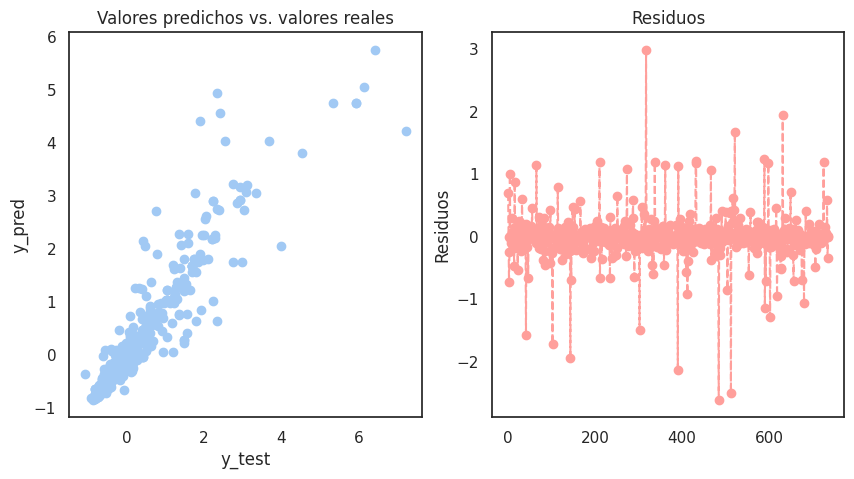

In [ ]:
n = y_pred.shape[0]
residuals = y_test - y_pred
fig, ax= plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(y_test, y_pred, 'bo')
ax[0].set_xlabel('y_test')
ax[0].set_ylabel('y_pred')
ax[0].title.set_text('Valores predichos vs. valores reales')

ax[1].plot(np.arange(0, n), residuals, 'ro--')
ax[1].set_ylabel('Residuos')
ax[1].title.set_text('Residuos')

## Ajuste de hiperparámetros de Random Forest
Intenta mejorar la precisión de tu modelo de Random Forest ajustando sus hiperparámetros utilizando GridSearch.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definiendo los hiperparámetros con estimator__ le paso al modelo dentro del bagging
nf = X_train.columns.shape[0]
params = {
    'estimator__min_samples_leaf': [1, 5, 10 , 15, 20],
    'estimator__max_features': [1, 3, 6],
    'n_estimators': range(10, 20)
}

# Grid search
grid = GridSearchCV(bagger, param_grid=params, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(estimator=BaggingRegressor(estimator=DecisionTreeRegressor()),
             param_grid={'estimator__max_features': [1, 3, 6],
                         'estimator__min_samples_leaf': [1, 5, 10, 15, 20],
                         'n_estimators': range(10, 20)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Mejor modelo
grid.best_estimator_

BaggingRegressor(estimator=DecisionTreeRegressor(max_features=3),
                 n_estimators=19)

In [ ]:
# Predicciones
best = grid.best_estimator_
best_preds = best.predict(X_test)

In [ ]:
y_test.shape

(737,)

In [ ]:
best_mse = mean_squared_error(y_test, best_preds)
print(f'El Best MSE es {best_mse}. El MSE sin tunear fue {mse}')

El Best MSE es 0.11762653482068582. El MSE sin tunear fue 0.1243999645791629


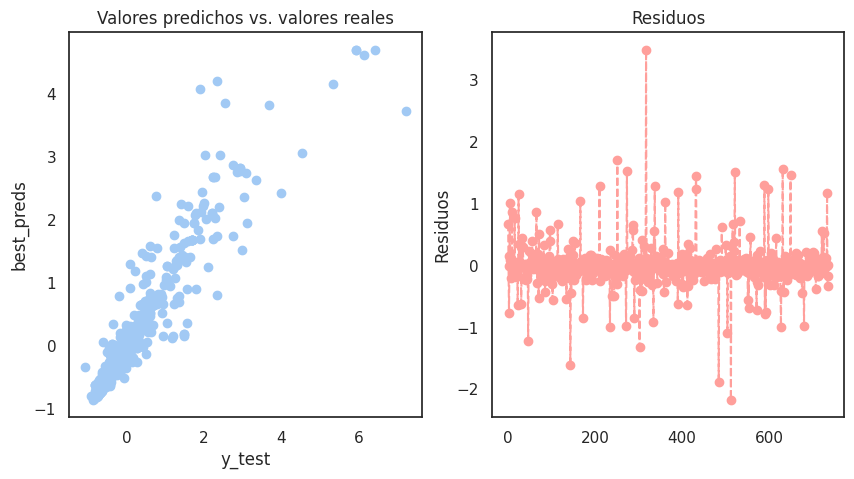

In [ ]:
n = best_preds.shape[0]
residuals = y_test - best_preds
fig, ax= plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(y_test, best_preds, 'bo')
ax[0].set_xlabel('y_test')
ax[0].set_ylabel('best_preds')
ax[0].title.set_text('Valores predichos vs. valores reales')

ax[1].plot(np.arange(0, n), residuals, 'ro--')
ax[1].set_ylabel('Residuos')
ax[1].title.set_text('Residuos')

## Importancia de Característica en Gradient Boosting
El objetivo es identificar la importancia de cada característica en el modelo Gradient Boosting. Basándose en los resultados, describe e interpreta la relevancia de cada característica en la predicción del costo del propiedad.

In [ ]:
import matplotlib.pyplot as plt

# Obtener el estimador base del BaggingRegressor

# Entrenar el estimador base


# Importancia de Características


# Graficando Importancia de Características
